In [1]:
############################################################
## Title  : 'Regression Analysis'                         ##
## Author : 'Sathish Kabatkar Ravindranth'                ##
## Date   : '27th January, 2023'                          ##
## Output : pdf document                                  ##
## Group  : 5                                             ##
############################################################

In [2]:
library(car)
library(ggplot2)
library(ggpubr)
library(dplyr)
library(olsrr)

Lade nötiges Paket: carData

Warning message:
“Paket ‘ggplot2’ wurde unter R Version 4.1.1 erstellt”
Warning message:
“Paket ‘dplyr’ wurde unter R Version 4.1.1 erstellt”

Attache Paket: ‘dplyr’


Das folgende Objekt ist maskiert ‘package:car’:

    recode


Die folgenden Objekte sind maskiert von ‘package:stats’:

    filter, lag


Die folgenden Objekte sind maskiert von ‘package:base’:

    intersect, setdiff, setequal, union


Warning message:
“Paket ‘olsrr’ wurde unter R Version 4.1.1 erstellt”

Attache Paket: ‘olsrr’


Das folgende Objekt ist maskiert ‘package:datasets’:

    rivers




In [3]:
#Loading the Input data
input_data <- read.csv('bodymeasurements.csv')

In [4]:
#Remove the variable ID
input_data  <- input_data  %>% dplyr::select(-ID)

In [5]:
#View the input data
head(input_data)

,Age,Sex,Height,Chest,Belly,Thigh,Knee,Calf,Ankle,Biceps,Wrist,Weight
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,21,m,174.0,89.5,71.5,51.5,34.5,36.5,23.5,32.5,16.5,65.6
2,23,m,175.3,97.0,79.0,51.5,36.5,37.5,24.5,34.4,17.0,71.8
3,28,m,193.5,97.5,83.2,57.3,37.0,37.3,21.9,33.4,16.9,80.7
4,23,m,186.5,97.0,77.8,53.0,37.0,34.8,23.0,31.0,16.6,72.6
5,22,m,187.2,97.5,80.0,55.4,37.7,38.6,24.4,32.0,18.0,78.8
6,21,m,181.5,99.9,82.5,57.5,36.6,36.1,23.5,33.0,16.9,74.8


In [6]:
#Summarise all continous variables
standard_deviations <- rbind.data.frame(lapply(input_data  %>% dplyr::select(-Sex),sd))
summary_table  <- rbind.data.frame(lapply(input_data  %>% dplyr::select(-Sex),summary))
summary_table  <-  rbind(summary_table, standard_deviations)
row.names(summary_table) <- c("Min", "Q1", "Median", "Mean", "Q3", "Max", "SD")
summary_table

,Age,Height,Chest,Belly,Thigh,Knee,Calf,Ankle,Biceps,Wrist,Weight
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Min,18.000000,147.200000,72.600000,57.900000,46.300000,29.000000,28.400000,16.400000,22.400000,13.000000,42.00000
Q1,22.000000,163.200000,84.775000,67.500000,53.700000,34.300000,34.000000,20.900000,27.275000,14.875000,57.30000
Median,25.000000,170.200000,90.950000,74.100000,56.300000,35.900000,35.800000,21.900000,30.350000,15.900000,66.80000
Mean,26.896226,170.879953,92.221226,75.282547,56.822170,36.005425,35.880425,22.025472,30.828302,15.967453,67.82217
Q3,31.250000,177.800000,99.825000,82.000000,59.500000,37.700000,37.700000,23.100000,34.125000,17.000000,75.62500
Max,40.000000,198.100000,116.700000,113.200000,75.700000,45.700000,45.000000,29.300000,42.400000,19.600000,105.20000
SD,5.848649,9.397658,9.600351,9.903932,4.431323,2.543892,2.755578,1.847268,4.267049,1.351132,12.73903


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


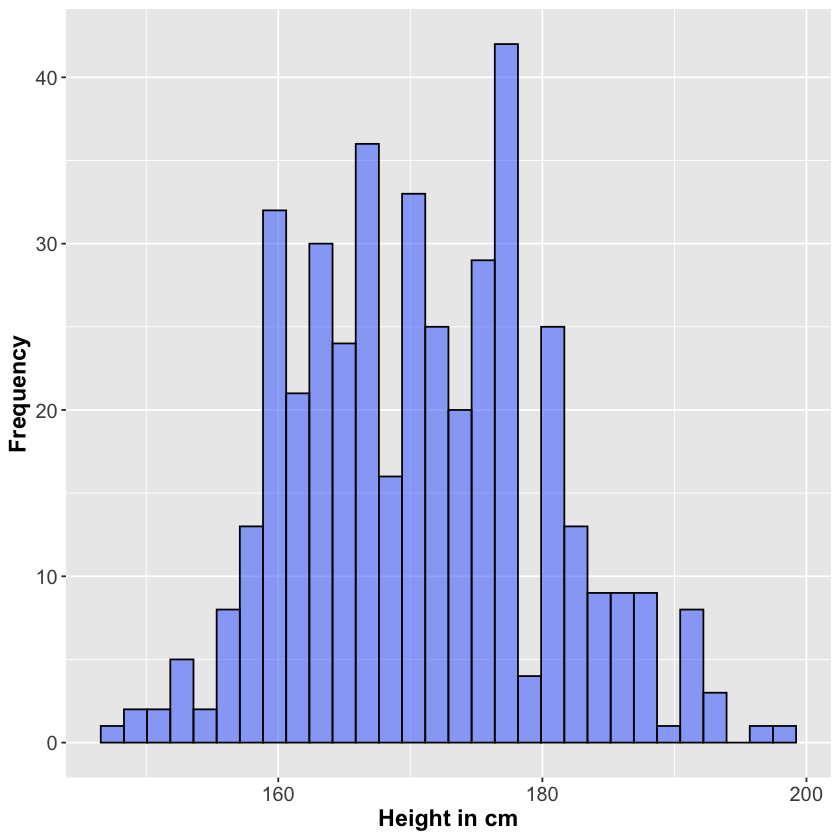

In [7]:
#Histogram to see the frequency distribution of the variable sqmPrice 
ggplot(input_data, aes(x=Height))+ 
  geom_histogram(color="black", fill="#3364FF", alpha = 0.5)+
  xlab("Height in cm") + ylab("Frequency") +
  theme(axis.text=element_text(size=12), axis.title=element_text(size=14 , face = "bold"))

In [8]:
#Linear regression model
full_model  <-  lm(Height ~ Age + Sex +
                            Chest + Belly +
                            Thigh + Knee + 
                            Calf + Ankle + 
                            Biceps + Wrist + 
                            Weight, data = input_data)
summary(full_model)


Call:
lm(formula = Height ~ Age + Sex + Chest + Belly + Thigh + Knee + 
    Calf + Ankle + Biceps + Wrist + Weight, data = input_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-13.9956  -2.5388   0.1734   2.7092  14.0613 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 211.23128    6.96030  30.348  < 2e-16 ***
Age           0.01769    0.03802   0.465   0.6420    
Sexm          6.38037    0.98056   6.507 2.23e-10 ***
Chest        -0.14534    0.06964  -2.087   0.0375 *  
Belly        -0.67402    0.05946 -11.335  < 2e-16 ***
Thigh        -0.58815    0.10001  -5.881 8.45e-09 ***
Knee          0.09616    0.17084   0.563   0.5738    
Calf         -0.67324    0.14570  -4.621 5.12e-06 ***
Ankle         0.10198    0.20798   0.490   0.6242    
Biceps       -1.01355    0.15004  -6.755 4.88e-11 ***
Wrist         0.52087    0.39333   1.324   0.1861    
Weight        1.40384    0.06858  20.469  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01

In [9]:
#Calculate Variance Inflation factor for the full model
vif_full_model  <- as.data.frame(round(vif(full_model),3))
colnames(vif_full_model)  <- "VIF"
vif_full_model

,VIF
,<dbl>
Age,1.158
Sex,5.600
Chest,10.473
Belly,8.125
Thigh,4.602
Knee,4.425
Calf,3.776
Ankle,3.458
Biceps,9.604


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


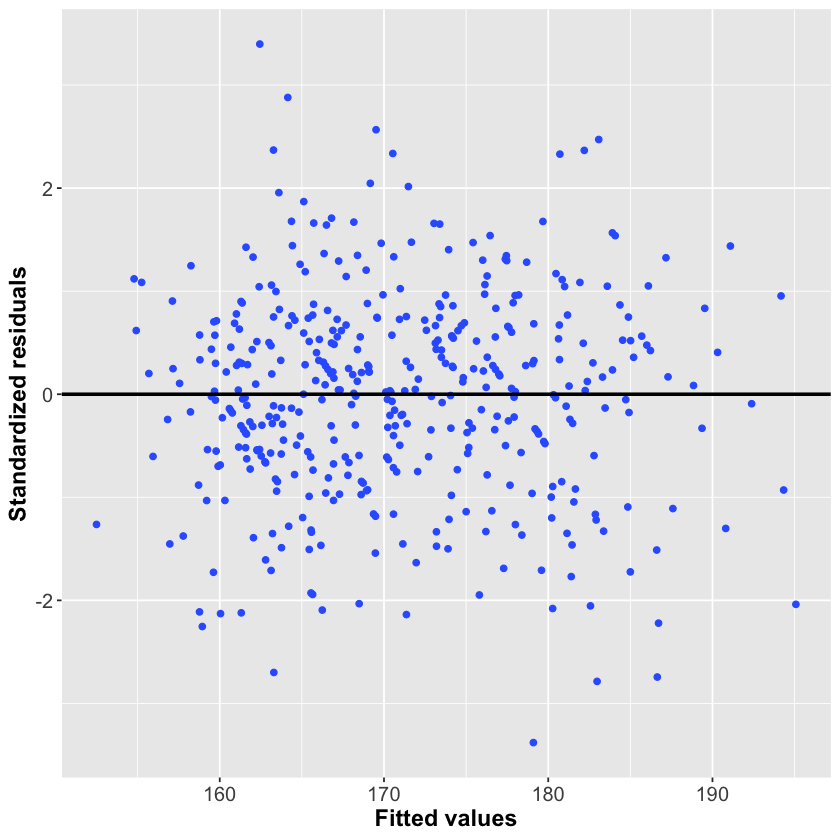

In [10]:
#Residual plot for standardized residuals vs Fitted model
ggplot(full_model, aes(x = .fitted, y = rstandard(full_model))) +
  geom_point(size = 1.5, color = "#3364FF") +
  geom_hline(yintercept = 0, color = "black", size = 1) + xlab("Fitted values") + ylab("Standardized residuals") +
      theme(axis.text=element_text(size=12), axis.title=element_text(size=14 , face = "bold"))

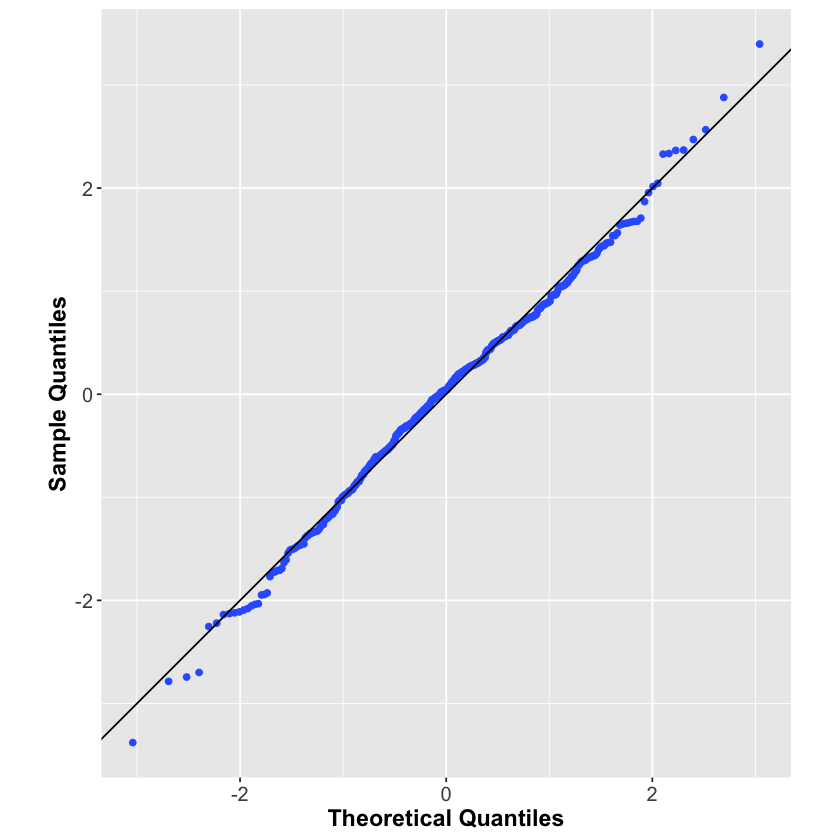

In [11]:
# QQ plot for the standardized residuals
ggplot() + geom_qq(aes(sample = rstandard(full_model)), color = "#3364FF") +
  geom_abline(color = "black") + coord_fixed() + xlab("Theoretical Quantiles") + ylab("Sample Quantiles") + 
    theme(axis.text=element_text(size=12), axis.title=element_text(size=14 , face = "bold"))

In [12]:
#Finding the best subsets using least squares estimator
best_subsets  <- ols_step_best_subset(full_model)

In [13]:
#Listing the best subsets
best_subsets  <- best_subsets  %>% mutate(Model = mindex, Number_of_covariates = n,
                         Covariates = predictors, Rsquared = rsquare,
                         AIC = aic, BIC = sbc)  %>% 
                  select(Model, Number_of_covariates, Covariates, Rsquared, AIC, BIC)                  
best_subsets

,Model,Number_of_covariates,Covariates,Rsquared,AIC,BIC
,<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
11,1,1,Weight,0.5283792,2789.499,2801.648
51,2,2,Thigh Weight,0.6646010,2646.977,2663.176
181,3,3,Belly Thigh Weight,0.7441007,2534.269,2554.518
505,4,4,Belly Thigh Biceps Weight,0.7674476,2495.706,2520.004
841,5,5,Sex Belly Thigh Biceps Weight,0.7886090,2457.254,2485.602
1360,6,6,Sex Belly Thigh Calf Biceps Weight,0.7969845,2442.113,2474.511
1710,7,7,Sex Chest Belly Thigh Calf Biceps Weight,0.7990088,2439.864,2476.311
1949,8,8,Sex Chest Belly Thigh Calf Biceps Wrist Weight,0.8004464,2438.820,2479.317
2029,9,9,Sex Chest Belly Thigh Knee Calf Biceps Wrist Weight,0.8006566,2440.373,2484.920


In [14]:
#best_subset using AIC
best_subsets  %>% filter(AIC == min(best_subsets$AIC))

Model,Number_of_covariates,Covariates,Rsquared,AIC,BIC
<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
8,8,Sex Chest Belly Thigh Calf Biceps Wrist Weight,0.8004464,2438.82,2479.317


In [15]:
#best_subset using BIC
best_subsets  %>% filter(BIC == min(best_subsets$BIC))

Model,Number_of_covariates,Covariates,Rsquared,AIC,BIC
<int>,<int>,<chr>,<dbl>,<dbl>,<dbl>
6,6,Sex Belly Thigh Calf Biceps Weight,0.7969845,2442.113,2474.511


In [16]:
# Fitting the model, based on the based subset selection using BIC
best_subset_model  <- lm(Height ~ Sex + Belly + Thigh + Calf + Biceps + Weight, data = input_data)
summary(best_subset_model)


Call:
lm(formula = Height ~ Sex + Belly + Thigh + Calf + Biceps + Weight, 
    data = input_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-15.0336  -2.5824   0.1241   2.6957  14.0164 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 213.72083    4.33769  49.271  < 2e-16 ***
Sexm          6.60926    0.94766   6.974 1.21e-11 ***
Belly        -0.72749    0.05296 -13.737  < 2e-16 ***
Thigh        -0.59827    0.09257  -6.463 2.87e-10 ***
Calf         -0.52786    0.12726  -4.148 4.07e-05 ***
Biceps       -1.10825    0.11774  -9.413  < 2e-16 ***
Weight        1.41574    0.05788  24.461  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 4.265 on 417 degrees of freedom
Multiple R-squared:  0.797,	Adjusted R-squared:  0.7941 
F-statistic: 272.8 on 6 and 417 DF,  p-value: < 2.2e-16


In [17]:
#Calculate Variance Inflation factor for the best subset model
vif_best_subset_model  <- as.data.frame(round(vif(best_subset_model),3))
colnames(vif_best_subset_model)  <- "VIF"
vif_best_subset_model

,VIF
,<dbl>
Sex,5.192
Belly,6.398
Thigh,3.913
Calf,2.860
Biceps,5.870
Weight,12.643


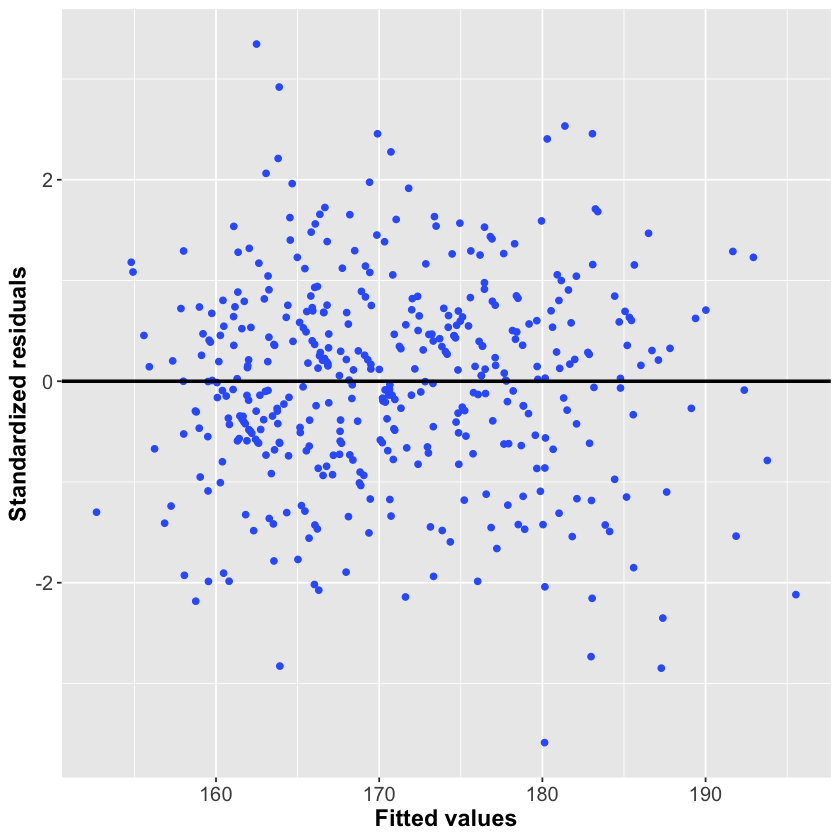

In [18]:
#Residual plot for standardized residuals vs Fitted best subset model
ggplot(best_subset_model, aes(x = .fitted, y = rstandard(best_subset_model))) +
  geom_point(size = 1.5, color = "#3364FF") +
  geom_hline(yintercept = 0, color = "black", size = 1) + xlab("Fitted values") + ylab("Standardized residuals") +
      theme(axis.text=element_text(size=12), axis.title=element_text(size=14 , face = "bold"))

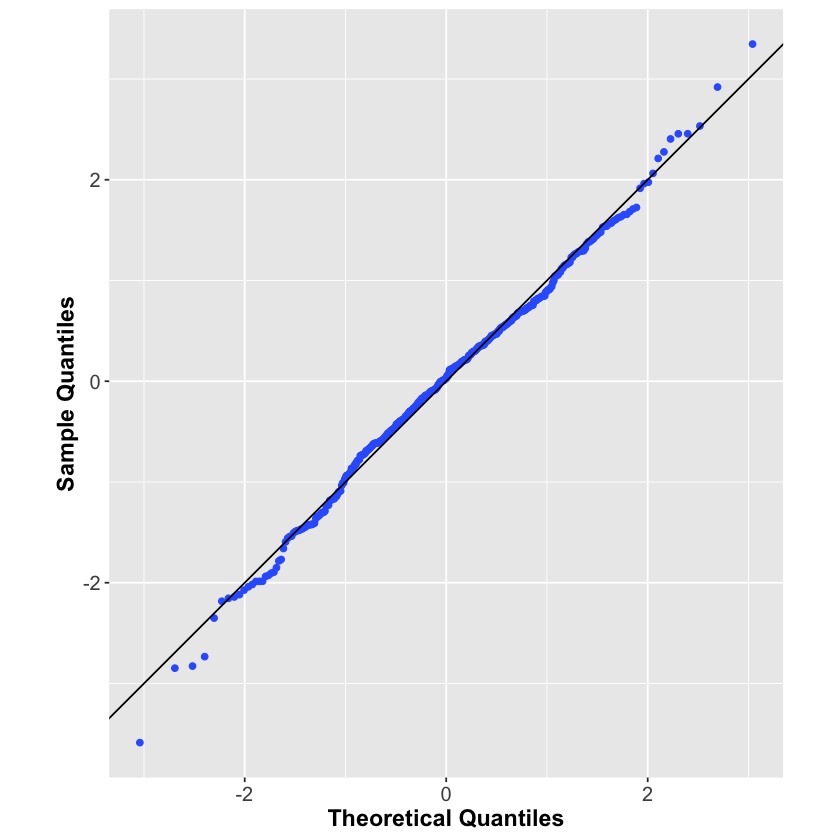

In [19]:
# QQ plot for the standardized residuals
ggplot() + geom_qq(aes(sample = rstandard(best_subset_model)), color = "#3364FF") +
  geom_abline(color = "black") + coord_fixed() + xlab("Theoretical Quantiles") + ylab("Sample Quantiles") + 
    theme(axis.text=element_text(size=12), axis.title=element_text(size=14 , face = "bold"))

In [20]:
#Extracting the coefficient values and p-values
coefficient_values  <- t(rbind(round(best_subset_model$coefficients,3)))
p_values  <- t(rbind(round(summary(best_subset_model)$coefficients[ , 4],10)))

In [21]:
#Finding the confidence intervals for the estimated coefficients
conf_intervals  <- as.data.frame(round(confint(best_subset_model, level = 0.95),3))
colnames(conf_intervals)  <- c("lower","upper")
conf_intervals['Confidence_interval']  <- paste0("[",conf_intervals$lower," , ", conf_intervals$upper, "]")
conf_intervals  <- conf_intervals  %>% select(Confidence_interval)

In [22]:
#Displaying the output
parameters  <- cbind(coefficient_values, conf_intervals, p_values)
colnames(parameters)  <- c("Estimated coefficients", "Confidence intervals", "P_values")
parameters

,Estimated coefficients,Confidence intervals,P_values
,<dbl>,<chr>,<dbl>
(Intercept),213.721,"[205.194 , 222.247]",0.00000e+00
Sexm,6.609,"[4.746 , 8.472]",0.00000e+00
Belly,-0.727,"[-0.832 , -0.623]",0.00000e+00
Thigh,-0.598,"[-0.78 , -0.416]",3.00000e-10
Calf,-0.528,"[-0.778 , -0.278]",4.07118e-05
Biceps,-1.108,"[-1.34 , -0.877]",0.00000e+00
Weight,1.416,"[1.302 , 1.53]",0.00000e+00
